In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
from scipy.stats import skew, kurtosis
import os

In [ ]:
plt.hist()

# Count Temp

In [28]:
def plot_temp_count(filenames, depth_column=2, temp_column=4, max_depth=70):
    """
    Function to plot histograms of temperature values for depth profiles, binned by 5 km intervals.
    
    Parameters:
        filenames (list): List of file paths to the input files.
        depth_column (int): Column index for depth data (zero-based).
        temp_column (int): Column index for temperature data (zero-based).
        max_depth (float): Maximum depth to filter data (in kilometers).
    """
    NAME = 'temp_dist'
    # Number of files (datasets)
    num_dataset = len(filenames)
    
    # Load data for all files
    data_files = [np.loadtxt(filename, comments='#', delimiter=',') for filename in filenames]

    # Determine the depth range for binning
    depth_min = min(np.min(data[:, depth_column]) for data in data_files)
    depth_max = max(np.max(data[:, depth_column]) for data in data_files)

    # Define bins (5 km intervals)
    bins = np.arange(0, np.ceil(depth_max / 5) * 5 + 1, 5)  # Bins from 0 to the next multiple of 5
    
    # Create subplots: len(bins)-1 rows, num_dataset columns
    fig, axes = plt.subplots(len(bins) - 1, num_dataset, figsize=(12 , 2 * (len(bins) - 1)), sharex=True, constrained_layout=True)

    # Loop through each bin and create histograms
    for i in range(len(bins) - 1):
        lower_bound, upper_bound = bins[i], bins[i+1]
        
        # Loop over the files to plot in each column
        for j, data in enumerate(data_files):
            # Filter data for the current depth bin
            depth_data = data[(data[:, depth_column] > lower_bound) & (data[:, depth_column] <= upper_bound)]
            
            # Extract the temperature data
            temp_data = depth_data[:, temp_column]
            
            # Calculate the average depth for this bin
            #avg_depth = np.mean(depth_data[:, depth_column])

            # Plot histogram
            axes[i, j].hist(temp_data, bins=20, color='blue', alpha=0.7,density=True)
            #axes[i, j].set_ylabel(f'{lower_bound}-{upper_bound} km', fontsize=10)  # Depth range for the bin
            axes[i, j].set_ylabel(f'{int(lower_bound)}-{int(upper_bound)} km', fontsize=10)  # Depth range for the bin
            axes[i, j].tick_params(axis='y', which='both', left=True, labelleft=True)  # Show y-axis ticks

            # x-axis labels for all subplots except the last one
            if i != len(bins) - 2:
                axes[i, j].tick_params(axis='x', which='both', bottom=True, labelbottom=True)

            # Calculate the average temperature for this bin
            mean_temp = np.mean(temp_data)

            # Add mean temperature line and annotation
            axes[i, j].axvline(mean_temp, color='red', linestyle='dashed', linewidth=2)  # Mean temp line
            #axes[i, j].text(mean_t, axes[i, j].get_ylim()[1] * 0.9, f'Mean: {mean_temp:.1f}°C', color='red', ha='center', fontsize=10)
            axes[i, j].text(0.9,0.9, f'Mean: {mean_temp:.1f}°C', color='red', ha='center', fontsize=10,
                           horizontalalignment='right',verticalalignment='top', transform=axes[i, j].transAxes)

    # Set column titles based on filenames (without the path and extension)
    for j, filename in enumerate(filenames):
        file_name = os.path.splitext(os.path.basename(filename))[0]  # Extract filename without path and extension
        axes[0, j].set_title(file_name, fontsize=12)

    # Add labels for the x and y axes for the entire figure
    fig.supxlabel('Temperature (°C)', fontsize=14)
    fig.supylabel('Count', fontsize=14)

    # Show the plot
    #plt.savefig(temp.png)  # Save as filename.png
    plt.savefig(f'{NAME}.png')
    plt.show()


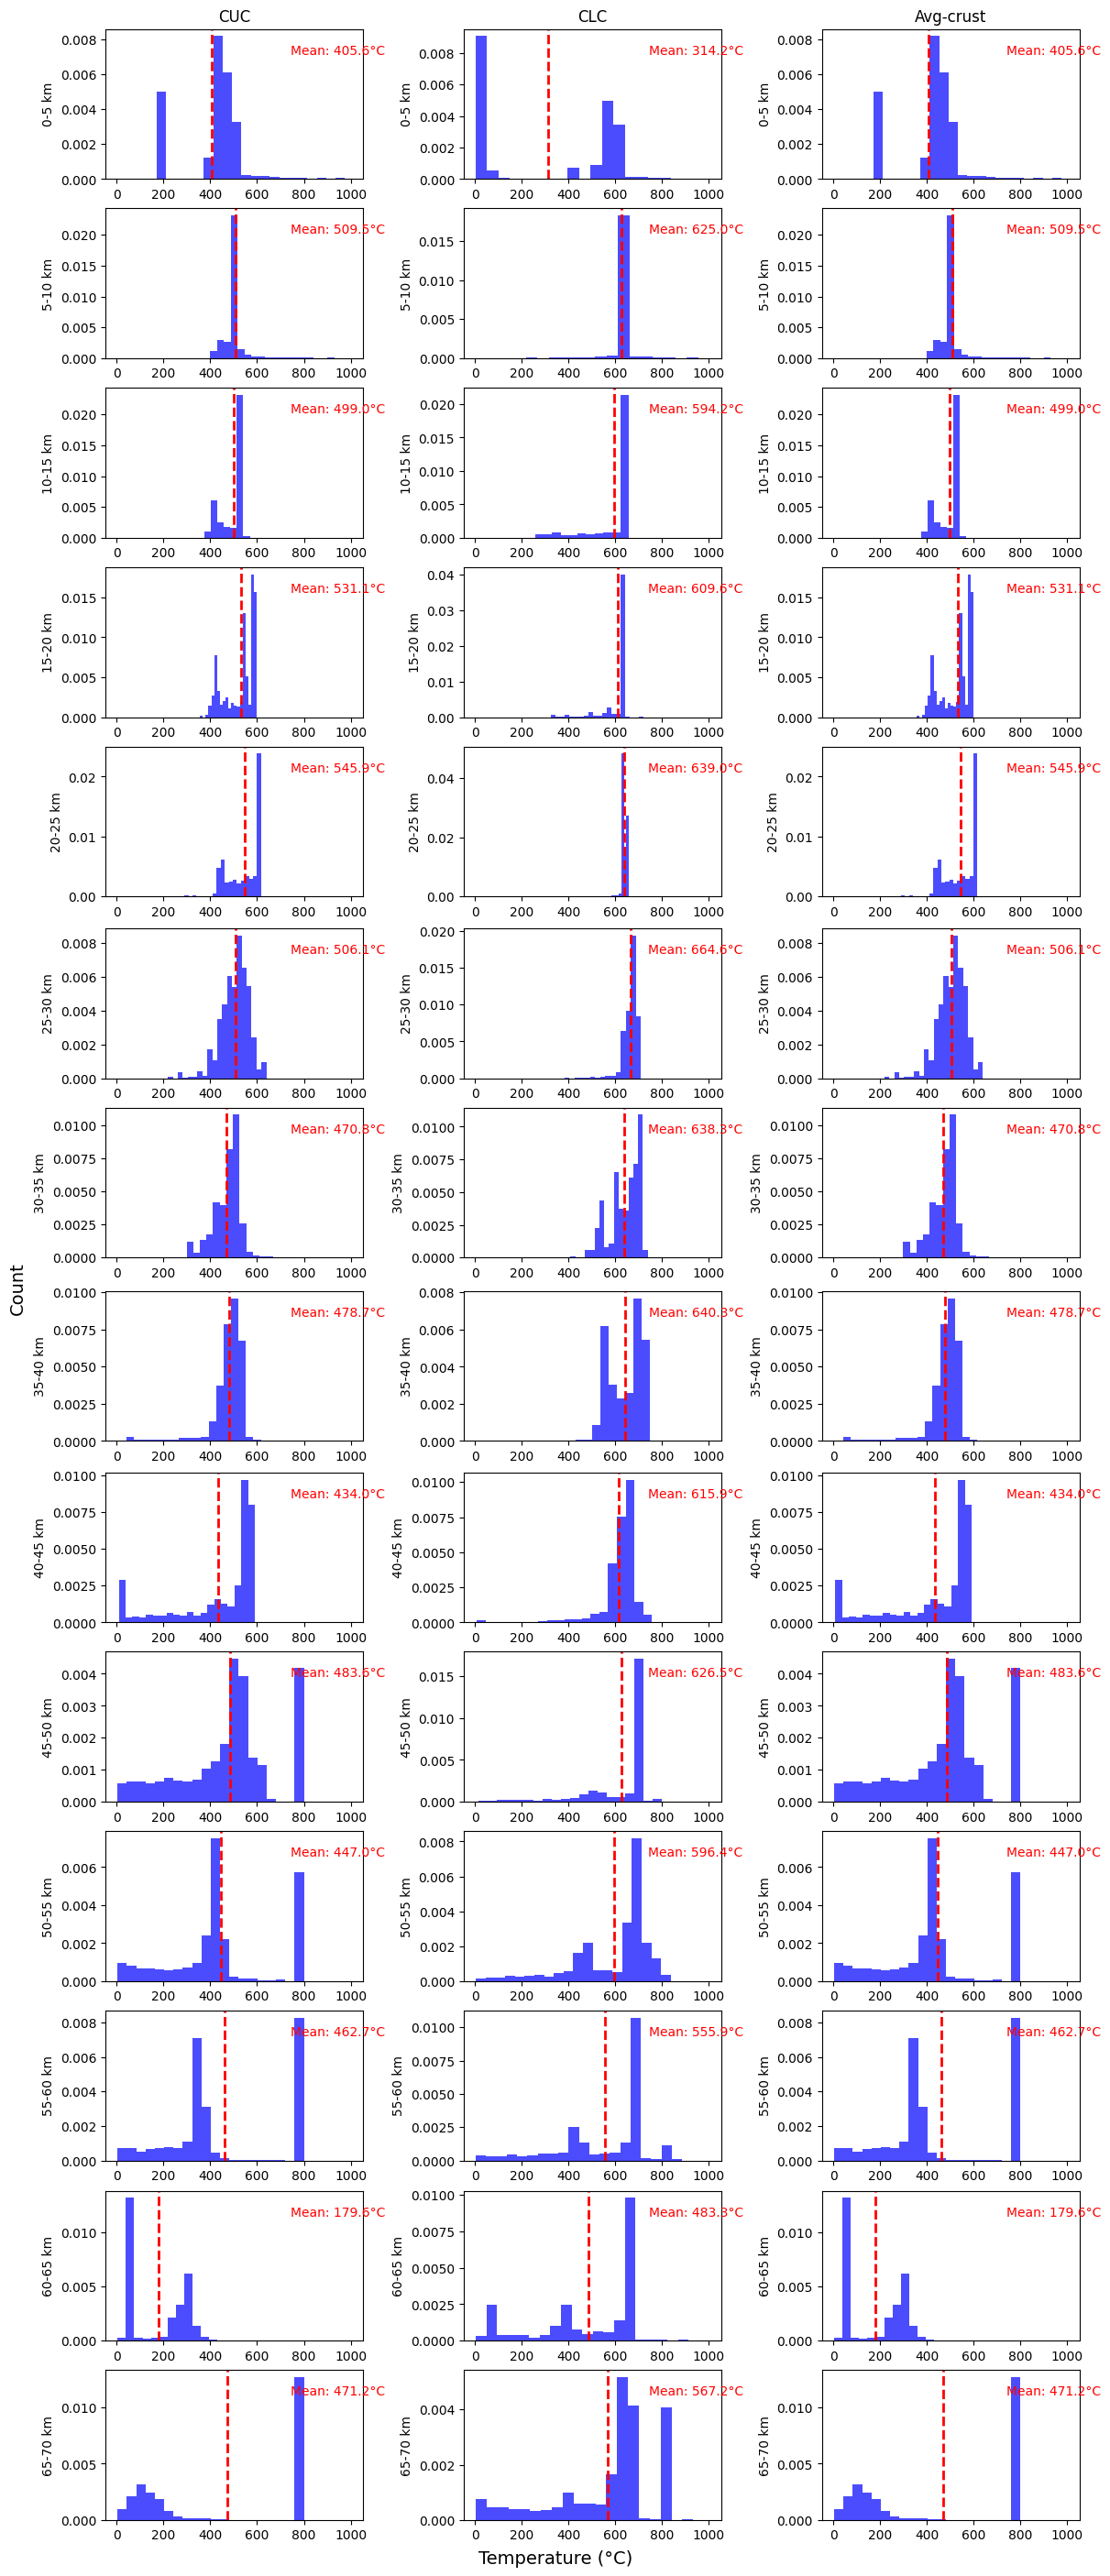

In [29]:
# Define the path to the files
path = "./output/AU/"  # Ensure the correct path

# List of filenames (without path)
filenames = ["CUC.out","CLC.out", "Avg-crust.out"]

# Add the path to each filename
filenames = [path + filename for filename in filenames]

# Call the plotting function for both files
plot_temp_count(filenames)